## 绘制残差图

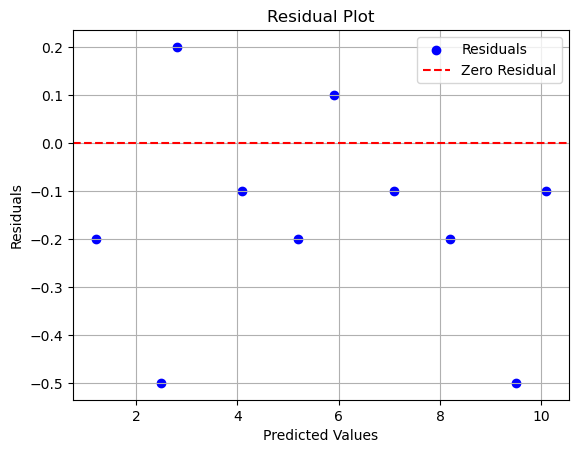

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据（替换为你自己的实际数据）
actual_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
predicted_values = np.array([1.2, 2.5, 2.8, 4.1, 5.2, 5.9, 7.1, 8.2, 9.5, 10.1])

# 计算残差
residuals = actual_values - predicted_values

# 绘制残差图
plt.scatter(predicted_values, residuals, c='b', marker='o', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

## 计算百分数

In [3]:
import numpy as np

def percentile(data, p):
    """
    计算给定数据data的百分位数
    参数:
    data: 一维数组或列表，包含要计算的数据
    p: 百分位数，取值范围为[0, 100]
    返回值:
    百分位数的值
    """
    # 将数据按升序排序
    sorted_data = np.sort(data)
    # 数据的长度
    n = len(sorted_data)
    # 计算百分位数对应的索引位置
    index = (p / 100) * (n - 1)
    
    if index.is_integer():
        # 如果索引是整数，直接返回该索引位置的值
        return sorted_data[int(index)]
    else:
        # 如果索引是浮点数，进行线性插值
        lower_index = int(index // 1)
        upper_index = lower_index + 1
        lower_value = sorted_data[lower_index]
        upper_value = sorted_data[upper_index]
        # 根据索引位置和两个最近的值，进行线性插值计算百分位数的值
        return lower_value + (index % 1) * (upper_value - lower_value)

# 示例数据
data = [12, 45, 7, 23, 9, 32, 15, 49, 5, 18]

# 计算中位数（50%百分位数）
median = percentile(data, 50)
print("中位数（50%百分位数）:", median)

# 计算第25%百分位数（第一四分位数）
q1 = percentile(data, 25)
print("第25%百分位数（第一四分位数）:", q1)

# 计算第75%百分位数（第三四分位数）
q3 = percentile(data, 75)
print("第75%百分位数（第三四分位数）:", q3)


中位数（50%百分位数）: 16.5
第25%百分位数（第一四分位数）: 9.75
第75%百分位数（第三四分位数）: 29.75


## BP检验
Breusch-Pagan检验（BP检验）是用于检验线性回归模型的异方差性（方差不恒定）的一种统计方法。

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan #BP检验

het_breuschpagan(resid, exog_het, robust=True)  
参数介绍:  
resid:残差  
exog_het:用于bp检验的自变量  

返回值：
lm : LM统计量值  
lm_pvalue : LM统计量的p值，若p值小于显著性水平，则拒绝残差方差为常数的原假设，即存在异方差性  
fvalue : F统计量值，用来检验残差平方项与自变量之间是否独立，如果独立则表明不存在异方差性       
f_pvalue : F统计量对应的p值，若p值小于显著性水平，则拒绝**残差方差为常数的原假设**，即存在异方差性

In [5]:
from statsmodels.stats.diagnostic import het_breuschpagan #BP检验
def bp_test(res, X):
    """
    Breusch-Pagan检验（BP检验）
    参数:
    res: 残差
    X: 用于bp检验的自变量
    返回值:
    lm : LM统计量值  
    lm_pvalue : LM统计量的p值，若p值小于显著性水平，则拒绝残差方差为常数的原假设，即存在异方差性  
    fvalue : F统计量值，用来检验残差平方项与自变量之间是否独立，如果独立则表明不存在异方差性         
    f_pvalue : F统计量对应的p值，若p值小于显著性水平，则拒绝残差方差为常数的原假设，即存在异方差性 
    """
    result_bp_test = het_breuschpagan(res, X)
    bp_lm_statistic = result_bp_test[0]
    bp_lm_pval = result_bp_test[1]
    bp_F_statistic= result_bp_test[2]
    bp_F_pval = result_bp_test[3]
    bp_test_output=pd.Series(result_bp_test[0:4],index=['bp_lm_statistic','bp_lm_pval','bp_F_statistic','bp_F_pval'])    
    return bp_test_output